<a href="https://colab.research.google.com/github/SykoTheKiD/NeuralPredictTutorial/blob/master/MLSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt install graphviz
!pip install pydot pydot-ng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


## Introduction to Artificial Neural Networks

This tutorial covers:
- What is an ANN?
- How to build one?
- How to train one?
- How do I use the trained ANN?

### What is an ANN?

Before I begin with the introduction, I highly recommend 3B1B's series on Neural Networks as they are very in depth and intuitive in their explainations of what and how a ANN works.

[3b1b Neural Network Series](https://https://www.youtube.com/watch?v=aircAruvnKk)

A neural network is essentially a weighted sum inference algorithm. It in as input a predefined set of numbers and then assigns a `weight` to each number and outputs another number based on the total weight calculation.

![Image of a Neuron (from KDNuggets)](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-09-at-3-42-21-am.png)

A series of these neurons make one layer in a neural network and a series of layers make a network.

![Neural Network from KDNuggets](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-09-at-4-19-50-am.png)

Repeated stacking of these layers is called `Deep Learning`


### The Project

In this tutorial we will use a neural network to perform a simple task. Given an array size *5* with numbers who continuously range from *n* to *m* (*n* and *m* range from -100 to 100) one number from that continuous range is missing. The neural network will try and figure it out.

While this problem is best solved using a non machine learning algorithm this is still a good problem to try and solve to learn the basics of neural networks for the following reasons:

- We do not need to worry about collecting data as we can generate infinitely many data points
- We can manipulate the dimensions of our data easily to fit our problem
- The network will be easy to train

### The code

First to begin we will import all the packages needed to develop the network

In [2]:
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam, RMSprop
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics
import pandas as pd
import random as rd
import numpy as np

from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


These are constants that will be referenced throughout the project.

Constants such as `BATCH_SIZE`, `NUM_EPOCHS`, `TRAIN_SIZE`, `TEST_SIZE` and `VALIDATION_SIZE` are called **hyperparameters**. These are parameters that do not change during training.

In [0]:
DATASET_SIZE = 1000000
MAX_RANGE = 100
MIN_RANGE = -100
BATCH_SIZE = 55
TEST_SIZE = 0.2
VALIDATION_SIZE=0.33
NUM_EPOCHS = 10
ARR_SIZE = 5

### Generating our dataset

We will generate our dataset  as described above

In [4]:
%time

dataset = []

for _ in range(DATASET_SIZE):
    tmp_inp = []
    start_int = rd.randint(MIN_RANGE, MAX_RANGE)
    
    for i in range(ARR_SIZE + 1):
        tmp_inp.append(start_int)
        start_int = start_int + 1

    rand_index = rd.randint(0, ARR_SIZE)
    output = tmp_inp.pop(rand_index)
    rd.shuffle(tmp_inp)
    tmp_inp.append(output)
    dataset.append(tmp_inp)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.82 µs


We will convert our list of lists into a Pandas DataFrame. Panda DataFrames are easier to use and feed into a neural network

In [0]:
df = pd.DataFrame(dataset, columns=['v1', 'v2', 'v3', 'v4', 'v5','out'])

In [6]:
df.head()

,v1,v2,v3,v4,v5,out
0,44,43,41,42,39,40
1,28,32,30,27,31,29
2,-93,-94,-89,-90,-91,-92
3,-47,-50,-51,-49,-48,-46
4,80,85,83,82,84,81


Now we can split our data into inputs and outputs

In [0]:
X, y = df.iloc[:, 0:5].values, df.iloc[:, 5].values 

A ML algorithm needs two types of datasets, a training set and a test set

A **training set** is what the network uses to learn and understand the data

A **test set** is what the network uses to see if it understood the data properly


We will split our **X, y** data into train and test sets

In [0]:
# Split training / val / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE)

### Creating our Neural Network

Now we can define our neural network

In [0]:
model = Sequential()
model.add(Dense(16, input_dim=ARR_SIZE, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                96        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 12)                396       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total para

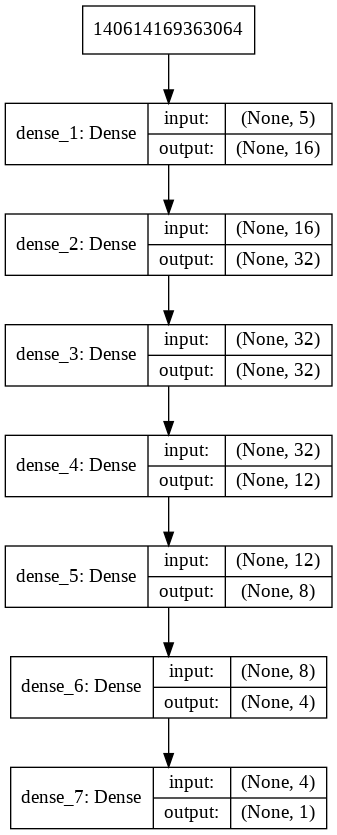

In [11]:
# Plot model graph
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

### Training our Model

Now we are ready to feed in the training data into out model and train our neural network

In [0]:
model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=[metrics.mse, 'accuracy'])

In [13]:
%time
history = model.fit(X_train, y_train, validation_split=VALIDATION_SIZE, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, verbose=1)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.54 µs
Train on 536000 samples, validate on 264000 samples
Epoch 1/10
536000/536000 [==============================] - 76s 143us/step - loss: 1583.5961 - mean_squared_error: 1583.5961 - acc: 0.0715 - val_loss: 1356.6733 - val_mean_squared_error: 1356.6733 - val_acc: 0.0773
Epoch 2/10
536000/536000 [==============================] - 75s 139us/step - loss: 1171.4974 - mean_squared_error: 1171.4974 - acc: 0.0822 - val_loss: 988.8490 - val_mean_squared_error: 988.8490 - val_acc: 0.0884
Epoch 3/10
536000/536000 [==============================] - 76s 142us/step - loss: 841.4321 - mean_squared_error: 841.4321 - acc: 0.1165 - val_loss: 696.2591 - val_mean_squared_error: 696.2591 - val_acc: 0.1469
Epoch 4/10
536000/536000 [==============================] - 77s 143us/step - loss: 581.1157 - mean_squared_error: 581.1157 - acc: 0.1671 - val_loss: 469.5096 - val_mean_squared_error: 469.5096 - val_acc: 0.1983
Epoch 5/10
536000/536000 [========

### Charting our learning

Now we can graph our loss and accuracy through the entire training process. This gives us insight in to how the training went and if we have potentially overfit to our data

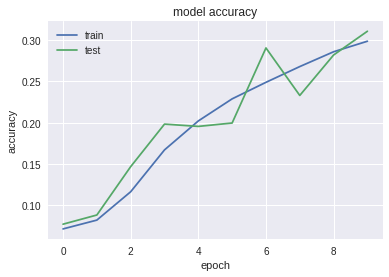

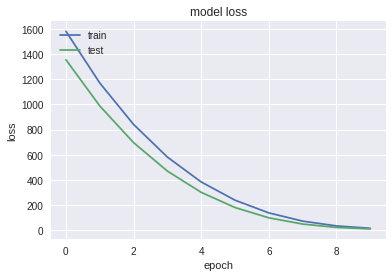

In [14]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluating our model

Now that we have trained the model we can evaluate in on our test set to see how well it did on values it has never seen before

In [15]:
scores = model.evaluate(X_test, y_test)

200000/200000 [==============================] - 10s 50us/step


Now we can see the average Mean Square Error for our test set

In [16]:
scores

[8.746109386634826, 8.746109386634826, 0.307955]

### Using our model

Now we are ready to use our model. We can predict what the missing number is given a random array

In [17]:
model.predict(np.array([[1,2,3,6,5]]))

array([[3.5183716]], dtype=float32)

We did not get the exact answer this is because 9/10 times in machine learning you try to get as close as possible to the correct answer. It is impossible to predict the future 100% of the time. 

We can train on more epochs and tune the hyperparameters to get a more accurate answer.

## Non-ML Algorithm

As mentioned, this problem can easily and much better be solved using a non-ML algorithm, so for fun lets implement it.

In [0]:
def missing_num(arr):
    if len(arr) < 2:
        return arr
    
    low_num = arr[0]
    high_num = arr[0]
    hmap = set()
    for each_number in arr:
        hmap.add(each_number)
        if each_number < low_num:
            low_num = each_number
        elif each_number > high_num:
            high_num = each_number
    ret = []
    for each_number in range(low_num, high_num):
        if each_number not in hmap:
            ret.append(each_number)
    
    return ret
    

In [19]:
missing_num([1,2,3,6,5])

[4]

Our non-ML algorithm works on any size array and at any range. This is also an important lesson on understanding if you should even use machine learning to solve your problem. Sometimes a non-ML algorithm works better.

### Next Steps

Some questions that may rise from this. 

- Why was the array size fixed?
- How do you choose the right hyperparameters?

These are questions we will tackle in the next tutorial **:-)**